 ![](fig/python-logo.png)

### Master 2 DUAS Unistra,  2017-2018

***

# Programmer en Python
***

## Une introduction à Pandas

***

Matthieu Boileau - [matthieu.boileau@math.unistra.fr](mailto: matthieu.boileau@math.unistra.fr)


*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), fortement inspiré de <https://github.com/pnavaro/big-data>*

![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")

# Pandas 

Un outil pour l'analyse de données

- première version en 2011
- basé sur NumPy
- largement inspiré par la toolbox R pour la manipulation de données
- structures de données auto-descriptives
- Fonctions de chargement et écriture vers les formats de fichiers courants
- Fonctions de tracé
- Outils statistiques basiques


# Series

[Documentation officielle](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- Une *series* Pandas:
    - un tableau 1D de données (éventuellement hétérogènes)
    - une séquence d'étiquettes appelée *index* de même longueur que le tableau 1D
    
- l'index peut être du contenu numérique, des chaînes de caractères, ou des dates-heures.
- si l'index est une valeur temporelle, alors il s'agit d'une [*time series*](https://en.wikipedia.org/wiki/Time_series)
- l'index par défaut est `range(len(data))`

## Illustration

In [74]:
import pandas as pd
import numpy as np

In [75]:
print(pd.Series([10, 8, 7, 6, 5]))
print(pd.Series([4, 3, 2, 1, 0.]))

0    10
1     8
2     7
3     6
4     5
dtype: int64
0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64


## Une série temporelle

In [86]:
time_period = pd.period_range('12/12/2017', '01/01/2018', freq="D")
pd.Series(index=time_period, data=range(len(time_period), 0, -1)) 

2017-12-12    21
2017-12-13    20
2017-12-14    19
2017-12-15    18
2017-12-16    17
2017-12-17    16
2017-12-18    15
              ..
2017-12-26     7
2017-12-27     6
2017-12-28     5
2017-12-29     4
2017-12-30     3
2017-12-31     2
2018-01-01     1
Freq: D, Length: 21, dtype: int64

## Un exemple de traitement

On exploite un texte tiré de ce site non officiel : http://www.sacred-texts.com/neu/mphg/mphg.htm

In [104]:
with open("exos/nee.txt") as f:
    nee = f.read()

print(nee)

HEAD KNIGHT:  Nee!
  Nee!
  Nee!
  Nee!
ARTHUR:  Who are you?
HEAD KNIGHT:  We are the Knights Who Say... Nee!
ARTHUR:  No!  Not the Knights Who Say Nee!
HEAD KNIGHT:  The same!
BEDEMIR:  Who are they?
HEAD KNIGHT:  We are the keepers of the sacred words:  Nee, Pen, and
  Nee-wom!
RANDOM:  Nee-wom!
ARTHUR:  Those who hear them seldom live to tell the tale!
HEAD KNIGHT:  The Knights Who Say Nee demand a sacrifice!
ARTHUR:  Knights of Nee, we are but simple travellers who seek the
  enchanter who lives beyond these woods.
HEAD KNIGHT:  Nee!  Nee!  Nee!  Nee!
ARTHUR and PARTY:  Oh, ow!
HEAD KNIGHT:  We shall say 'nee' again to you if you do not appease us.
ARTHUR:  Well, what is it you want?
HEAD KNIGHT:  We want... a shrubbery!
  [dramatic chord]
ARTHUR:  A what?
HEAD KNIGHT:  Nee!  Nee!
ARTHUR and PARTY:  Oh, ow!
ARTHUR:  Please, please!  No more!  We shall find a shrubbery.
HEAD KNIGHT:  You must return here with a shrubbery or else you will
  never pass through this wood alive!
ARTHUR

## On veut dénombrer les occurrences de mots

In [111]:
from collections import Counter
import operator

filtered_ni = ni  # on copie la chaîne initiale

# On remplace supprime ponctuation 
for s in '.', '!', ',', '?', ':', '[', ']':
    filtered_ni = filtered_ni.replace(s, '')

# On transforme en minuscule
# On découpe en une liste de mots
filtered_ni = filtered_ni.lower().split()

# On crée un object compteur
c = Counter(filtered_ni)

# On ne retient que les mots qui apparaissent plus de 2 fois
c = Counter({x : c[x] for x in c if c[x] > 2})
c

Counter({'a': 6,
         'and': 6,
         'are': 6,
         'arthur': 12,
         'head': 13,
         'knight': 12,
         'knights': 6,
         'nee': 16,
         'not': 3,
         'of': 4,
         'say': 4,
         'shrubbery': 4,
         'the': 8,
         'we': 7,
         'who': 8,
         'you': 7})

## On crée une série à partir de l'objet  `c`

> Notons que la série est ordonnée avec un index croissant (dans l'ordre alphabétique).

In [115]:
words = pd.Series(c)
words

a             6
and           6
are           6
arthur       12
head         13
knight       12
knights       6
             ..
of            4
say           4
shrubbery     4
the           8
we            7
who           8
you           7
Length: 16, dtype: int64

## On représente sur un histogramme



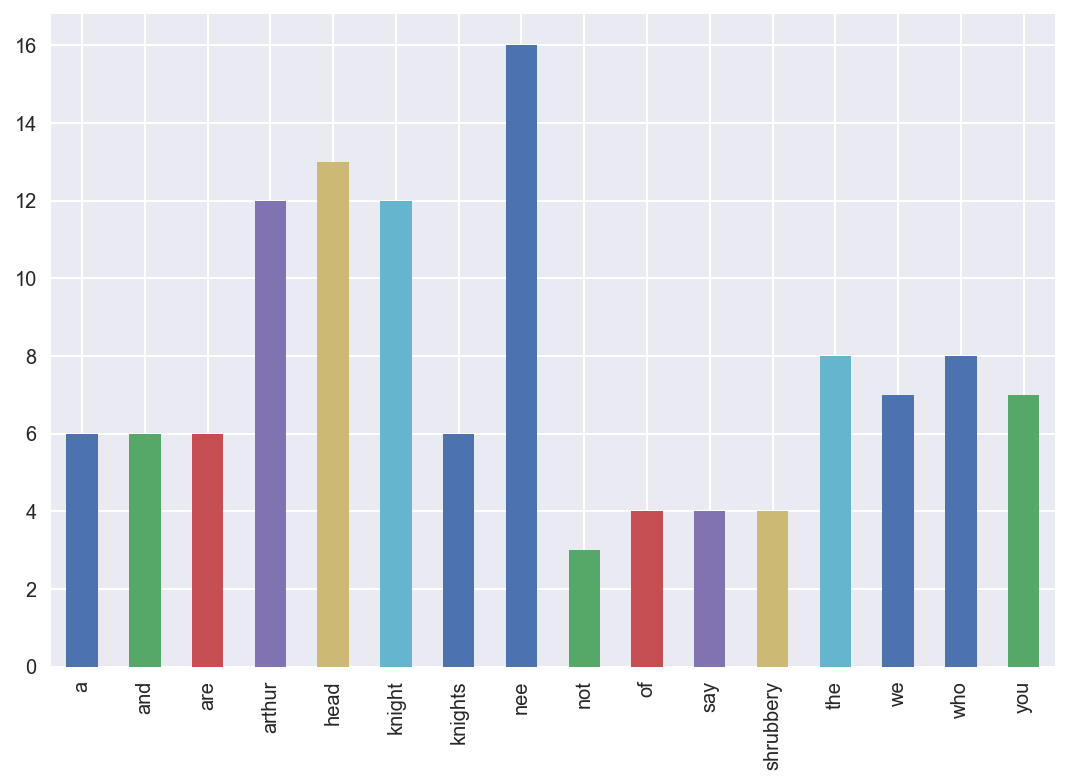

In [116]:
words.plot(kind='bar');

# [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [5]:
%reset -f
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", 15)
plt.rcParams['figure.figsize'] = (9, 6)

## Quartiers

Données en provenance de : https://www.strasbourg.eu/decoupage-15-quartiers

In [33]:
import geopandas as gpd
quartiers = gpd.read_file("quartiers/CUS_CUS_DUAH_QUART/SHP/Quartiers_Strasbourg_15.shp")
quartiers["QUARTIER"] = quartiers["QUARTIER"].str.lower()
aire = pd.Series(quartiers.area)
aire.index = quartiers["QUARTIER"]
aire.index = aire.index.str.lower()

## Arbres

Source des données : https://www.strasbourg.eu/arbres-alignements-espaces-verts

In [34]:
arbres_all = pd.read_csv("arbres/CUS_CUS_DEPN_ARBR.csv", encoding='latin', delimiter=";")
print(arbres_all.columns)
#print(arbres)
# On garde uniquement les arbres de la ville de Strasbourg
arbres = arbres_all[arbres_all['point vert VILLE'] ==  "STRASBOURG"]

Index(['Num point vert', 'point vert NOM_USUEL', 'point vert ADRESSE',
       'point vert VILLE', 'Point vert Quartier usuel', 'point vert TYPOLOGIE',
       'n°arbre SIG', 'Libellé_Essence', 'Diam fût à 1m', 'Hauteur arbre'],
      dtype='object')


In [35]:
convertion_dict = {"CENTRE": "centre_ville",
                   ("BOURSE", "ESPLANADE", "KRUTENAU"): "bourse_esplanade_krutenau",
                   ("ORANGERIE", "CONSEIL-XV"): "orangerie_conseil_des_xv",
                   ("GARE", "TRIBUNAL"): "gare_tribunal",
                   ("HAUTEPIERRE", "POTERIE"): "hautepierre_poteries",
                   "MUSAU": "NEUDORF",
                   "STOCKFELD": "NEUHOF2",
                   "PLAINE DES BOUCHERS": "MEINAU",
                   "POLYGONE": "NEUHOF",
                   "PORTE DE SCHIRMECK": "ELSAU",
                   ("ROBERTSAU", "WACKEN"): "ROBERTSAU_WACKEN"}

for k, v in convertion_dict.items():
    arbres = arbres.replace(to_replace=k, value=v)

In [49]:
?arbres_count.value_counts()

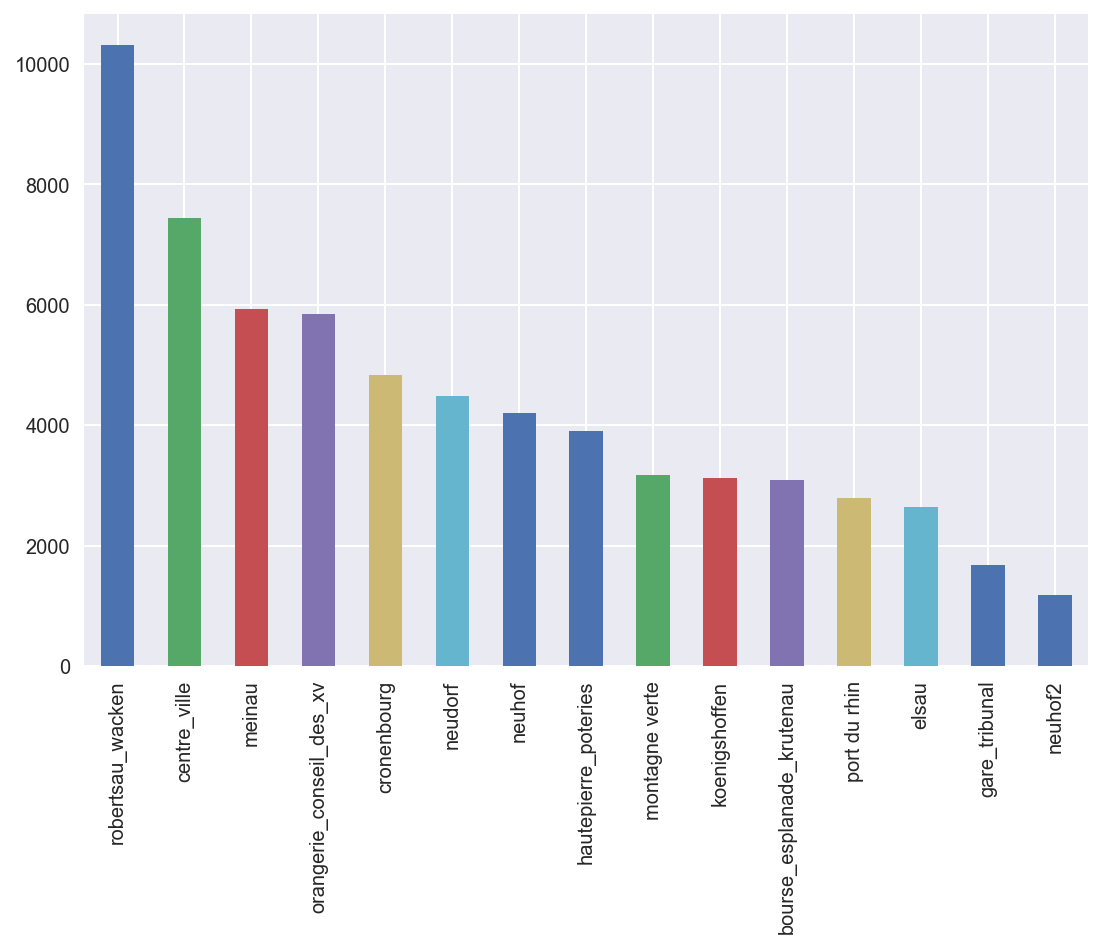

In [51]:
# On construit une série
arbres_count = pd.Series(arbres['Point vert Quartier usuel']).value_counts()
arbres_count.index = arbres_count.index.str.lower()
arbres_count.plot(kind='bar');

In [47]:
arbres_count.index

Index(['robertsau_wacken', 'centre_ville', 'meinau',
       'orangerie_conseil_des_xv', 'cronenbourg', 'neudorf', 'neuhof',
       'hautepierre_poteries', 'montagne verte', 'koenigshoffen',
       'bourse_esplanade_krutenau', 'port du rhin', 'elsau', 'gare_tribunal',
       'neuhof2'],
      dtype='object')

In [48]:
aire.index

Index(['orangerie_conseil_des_xv', 'bourse_esplanade_krutenau', 'centre_ville',
       'gare_tribunal', 'meinau', 'elsau', 'robertsau_wacken',
       'hautepierre_poteries', 'koenigshoffen', 'montagne_verte',
       'cronenbourg', 'neuhof', 'neudorf', 'port_du_rhin', 'neuhof2'],
      dtype='object', name='QUARTIER')

In [38]:
densite = arbres_count/aire
arbres_count
densite

bourse_esplanade_krutenau    0.001659
centre_ville                 0.004147
cronenbourg                  0.001136
elsau                        0.001411
gare_tribunal                0.000553
hautepierre_poteries         0.001343
koenigshoffen                0.001133
                               ...   
neudorf                      0.000909
neuhof                       0.001066
neuhof2                      0.000065
orangerie_conseil_des_xv     0.002031
port du rhin                      NaN
port_du_rhin                      NaN
robertsau_wacken             0.000572
Length: 17, dtype: float64

In [43]:
import os
import folium

STRASBOURG_COORD = (48.58, 7.75)
m = folium.Map(STRASBOURG_COORD, zoom_start=11, tiles='cartodbpositron')

folium.GeoJson(quartiers).add_to(m)

m.save(os.path.join('html', 'geopandas_0.html'))

In [44]:
m.choropleth(geo_data=quartiers, 
             data=arbres_count,
             columns=["QUARTIER", "Nb_arbres"],
             key_on='feature.properties.QUARTIER',
             fill_color = 'YlGnBu',
             fill_opacity = 0.5,
             line_opacity = 0.2,
             legend_name = r"Nombre d\'arbres par quartier")
display(m)
m.save(os.path.join('html', 'geopandas_0.html'))

https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-enseignants-titulaires-esr-public/export/?disjunctive.annee


In [58]:
csv_file = "fr-esr-enseignants-titulaires-esr-public.csv"

#!head csv_file
esr = pd.read_csv(csv_file, delimiter=";")
esr

,Rentrée,Année universitaire,Établissement,Type établissement,Région,Académie,Sexe,Classe âge,Categorie de personnels,Grandes disciplines,...,Quotite travail,ID académie,ID région,Identifiant établissement,Code categorie personnels,Code groupe CNU,Code grande discipline,effectif,code_section_cnu,geolocalisation
0,2011,2011-2012,Université de La Rochelle,Université,Nouvelle-Aquitaine,Poitiers,Femme,36 à 55 ans,Maître de conférences et assimilés,Sciences et techniques,...,100,A13,R75,0171463Y,MCF,5,3S,1,2700,"46.1482, -1.15506"
1,2011,2011-2012,Université de La Rochelle,Université,Nouvelle-Aquitaine,Poitiers,Femme,36 à 55 ans,Maître de conférences et assimilés,Sciences et techniques,...,100,A13,R75,0171463Y,MCF,6,3S,3,2800,"46.1482, -1.15506"
2,2011,2011-2012,Université de La Rochelle,Université,Nouvelle-Aquitaine,Poitiers,Femme,36 à 55 ans,Maître de conférences et assimilés,Sciences et techniques,...,100,A13,R75,0171463Y,MCF,8,3S,1,3500,"46.1482, -1.15506"
3,2011,2011-2012,Université de La Rochelle,Université,Nouvelle-Aquitaine,Poitiers,Femme,36 à 55 ans,Maître de conférences et assimilés,Sciences et techniques,...,100,A13,R75,0171463Y,MCF,10,3S,1,6500,"46.1482, -1.15506"
4,2011,2011-2012,Université de La Rochelle,Université,Nouvelle-Aquitaine,Poitiers,Femme,36 à 55 ans,Maître de conférences et assimilés,Sciences et techniques,...,100,A13,R75,0171463Y,MCF,10,3S,1,6900,"46.1482, -1.15506"
5,2011,2011-2012,Université de La Rochelle,Université,Nouvelle-Aquitaine,Poitiers,Femme,36 à 55 ans,Professeur et assimilés,"Droit, sciences économiques et de gestion",...,100,A13,R75,0171463Y,PR,1,1D,1,200,"46.1482, -1.15506"
6,2011,2011-2012,Université de La Rochelle,Université,Nouvelle-Aquitaine,Poitiers,Femme,36 à 55 ans,Professeur et assimilés,Sciences et techniques,...,100,A13,R75,0171463Y,PR,10,3S,1,6700,"46.1482, -1.15506"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144671,2015,2015-2016,Université de Grenoble Alpes,Université,Auvergne-Rhône-Alpes,Grenoble,Homme,36 à 55 ans,Professeur et assimilés,Médecine,...,100,A08,R84,0383493R,PR,12,5M,1,4604,"45.1918, 5.76726"
144672,2015,2015-2016,Université de Grenoble Alpes,Université,Auvergne-Rhône-Alpes,Grenoble,Homme,36 à 55 ans,Professeur et assimilés,Médecine,...,100,A08,R84,0383493R,PR,12,5M,1,4701,"45.1918, 5.76726"


In [ ]:
import os
import folium

STRASBOURG_COORD = (48.58, 7.75)
m = folium.Map(STRASBOURG_COORD, zoom_start=11, tiles='cartodbpositron')

folium.GeoJson("fr-esr-enseignants-titulaires-esr-public.geojson").add_to(m)

m.save(os.path.join('html', 'geopandas_1.html'))

m

In [ ]:
import folium
import pandas as pd
import geojsonio

SF_COORDINATES = (37.76, -122.45)
crimedata = pd.read_csv('Police_Department_Incidents_2016.csv')

# for speed purposes
MAX_RECORDS = 1000
 
# create empty map zoomed in on San Francisco
m = folium.Map(location=SF_COORDINATES, zoom_start=12)

# definition of the boundaries in the map
district_geo = r'sfpddistricts.geojson'
 
# calculating total number of incidents per district
crimedata2 = pd.DataFrame(crimedata['PdDistrict'].value_counts().astype(float))

In [ ]:
crimedata2

In [ ]:
crimedata2.to_json('crimeagg.json')

In [ ]:
crimedata2 = crimedata2.reset_index()
crimedata2.columns = ['District', 'Number']
crimedata2

In [ ]:
dist_json = gpd.read_file(district_geo)
dist_json

In [ ]:
# creation of the choropleth
map1 = folium.Map(location=SF_COORDINATES, zoom_start=12)
map1.choropleth(geo_data = district_geo, 
              data = crimedata2,
              columns = ['District', 'Number'],
              key_on = 'feature.properties.DISTRICT',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of incidents per district')
              
display(map1)